X (Features): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Y (Target): ['malignant' 'benign']
0.9263157894736842


[Text(0.5, 0.8333333333333334, 'X[23] <= 884.55\ngini = 0.436\nsamples = 284\nvalue = [91, 193]'),
 Text(0.25, 0.5, 'X[27] <= 0.172\ngini = 0.143\nsamples = 207\nvalue = [16, 191]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.078\nsamples = 198\nvalue = [8, 190]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.75, 0.5, 'X[4] <= 0.082\ngini = 0.051\nsamples = 77\nvalue = [75, 2]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]')]

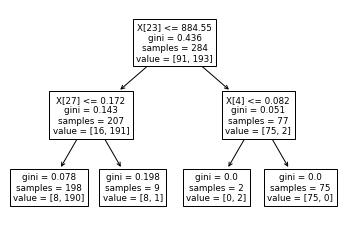

In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D

cancer = datasets.load_breast_cancer()
x = cancer.feature_names
y = cancer.target_names
dataSet = cancer.data
targetSet = cancer.target
print(f"X (Features): {x}\nY (Target): {y}") 
X_train, X_test, y_train, y_test = train_test_split(dataSet, targetSet, test_size=0.5)

#Decision Tree
treeForG = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
treeForG = treeForG.fit(X_train,y_train)
predict = treeForG.predict(X_test) 
print(accuracy_score(y_test,predict))
plot_tree(treeForG)



Text(0, 0.5, 'Score')

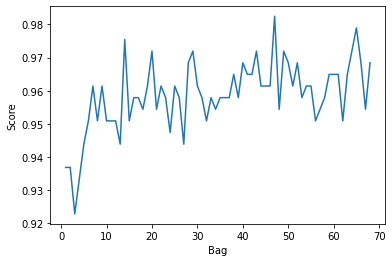

In [13]:
bag = []
bagScore = []
for i in range(1,69):
    graphForI = BaggingClassifier(n_estimators=i).fit(X_train, y_train)
    bag.append(i)
    bagScore.append(accuracy_score(y_test,graphForI.predict(X_test)))
plt.plot(bag,bagScore)
plt.xlabel('Bag')
plt.ylabel("Score")

Text(0, 0.5, 'Score')

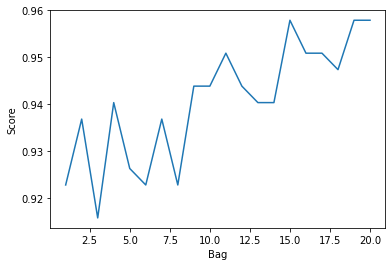

In [14]:
bag = []
adaScore = []
for i in range(1,21):
    graphForJ = AdaBoostClassifier(n_estimators=i).fit(X_train,y_train)
    bag.append(i)
    adaScore.append(accuracy_score(y_test,graphForJ.predict(X_test)))
plt.plot(bag, adaScore)
plt.xlabel('Bag')
plt.ylabel('Score')

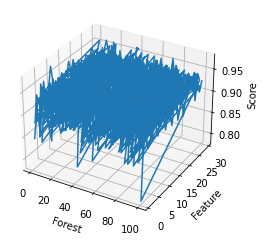

In [15]:
forest = []
feature = []
score = []
for i in range(1,101):
    for j in range(1,len(x)):
        graphForLast = RandomForestClassifier(n_estimators=1,max_features=j).fit(X_train,y_train)
        forest.append(i)
        feature.append(j)
        score.append(accuracy_score(y_test,graphForLast.predict(X_test)))

ax = plt.axes(projection = "3d")
ax.plot3D(forest, feature, score)
ax.set_xlabel("Forest")
ax.set_ylabel("Feature")
ax.set_zlabel("Score") 
plt.show()